<a href="https://colab.research.google.com/github/AudreyyFortune/kaggle/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploration et analyse des données




In [ ]:
# First we get miniconda and adapt the version to google colab with python 3.6
%env PYTHONPATH=
!wget -c https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
!chmod +x Miniconda3-4.5.4-Linux-x86_64.sh
!bash ./Miniconda3-4.5.4-Linux-x86_64.sh -b -f -p /usr/local
!conda install -q -y --prefix /usr/local python=3.6 ujson

# Import of modules
import sys
sys.path.append('/usr/local/lib/python3.6/site-packages')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime
# Magic line for matplotlib display
%matplotlib inline
import io
from google.colab import files


env: PYTHONPATH=
--2020-10-24 09:22:50--  https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58468498 (56M) [application/x-sh]
Saving to: ‘Miniconda3-4.5.4-Linux-x86_64.sh’

Miniconda3-4.5.4-Li 100%[===================>]  55.76M   154MB/s    in 0.4s    

2020-10-24 09:22:50 (154 MB/s) - ‘Miniconda3-4.5.4-Linux-x86_64.sh’ saved [58468498/58468498]

PREFIX=/usr/local
installing: python-3.6.5-hc3d631a_2 ...
Python 3.6.5 :: Anaconda, Inc.
installing: ca-certificates-2018.03.07-0 ...
installing: conda-env-2.6.0-h36134e3_1 ...
installing: libgcc-ng-7.2.0-hdf63c60_3 ...
installing: libstdcxx-ng-7.2.0-hdf63c60_3 ...
installing: libffi-3.2.1-hd88cf55_4 ...
installing: ncurses-6.1-hf484d3e_0 ...
installing: openssl-1.0.2o-h20670df_0 ...
i

## Lecture des données

In [ ]:
# Uploading data
uploaded = files.upload()

Saving sample_submission.csv to sample_submission.csv
Saving test.json to test.json
Saving train.json to train.json


In [ ]:
# Reading the data 
train_data = pd.read_json(io.BytesIO(uploaded["train.json"]), lines = True).drop('index' , axis = 1)
test_data = pd.read_json(io.BytesIO(uploaded["test.json"]), lines = True).drop('index' , axis = 1)

# Head of the train data
train_data.head()


,id,sequence,structure,predicted_loop_type,signal_to_noise,SN_filter,seq_length,seq_scored,reactivity_error,deg_error_Mg_pH10,deg_error_pH10,deg_error_Mg_50C,deg_error_50C,reactivity,deg_Mg_pH10,deg_pH10,deg_Mg_50C,deg_50C
0,id_001f94081,GGAAAAGCUCUAAUAACAGGAGACUAGGACUACGUAUUUCUAGGUA...,.....((((((.......)))).)).((.....((..((((((......,EEEEESSSSSSHHHHHHHSSSSBSSXSSIIIIISSIISSSSSSHHH...,6.894,1,107,68,"[0.1359, 0.20700000000000002, 0.1633, 0.1452, ...","[0.26130000000000003, 0.38420000000000004, 0.1...","[0.2631, 0.28600000000000003, 0.0964, 0.1574, ...","[0.1501, 0.275, 0.0947, 0.18660000000000002, 0...","[0.2167, 0.34750000000000003, 0.188, 0.2124, 0...","[0.3297, 1.5693000000000001, 1.1227, 0.8686, 0...","[0.7556, 2.983, 0.2526, 1.3789, 0.637600000000...","[2.3375, 3.5060000000000002, 0.3008, 1.0108, 0...","[0.35810000000000003, 2.9683, 0.2589, 1.4552, ...","[0.6382, 3.4773, 0.9988, 1.3228, 0.78770000000..."
1,id_0049f53ba,GGAAAAAGCGCGCGCGGUUAGCGCGCGCUUUUGCGCGCGCUGUACC...,.....(((((((((((((((((((((((....)))))))))).)))...,EEEEESSSSSSSSSSSSSSSSSSSSSSSHHHHSSSSSSSSSSBSSS...,0.193,0,107,68,"[2.8272, 2.8272, 2.8272, 4.7343, 2.5676, 2.567...","[73705.3985, 73705.3985, 73705.3985, 73705.398...","[10.1986, 9.2418, 5.0933, 5.0933, 5.0933, 5.09...","[16.6174, 13.868, 8.1968, 8.1968, 8.1968, 8.19...","[15.4857, 7.9596, 13.3957, 5.8777, 5.8777, 5.8...","[0.0, 0.0, 0.0, 2.2965, 0.0, 0.0, 0.0, 0.0, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[4.947, 4.4523, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[4.8511, 4.0426, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[7.6692, 0.0, 10.9561, 0.0, 0.0, 0.0, 0.0, 0.0..."
2,id_006f36f57,GGAAAGUGCUCAGAUAAGCUAAGCUCGAAUAGCAAUCGAAUAGAAU...,.....((((.((.....((((.(((.....)))..((((......)...,EEEEESSSSISSIIIIISSSSMSSSHHHHHSSSMMSSSSHHHHHHS...,8.800,1,107,68,"[0.0931, 0.13290000000000002, 0.11280000000000...","[0.1365, 0.2237, 0.1812, 0.1333, 0.1148, 0.160...","[0.17020000000000002, 0.178, 0.111, 0.091, 0.0...","[0.1033, 0.1464, 0.1126, 0.09620000000000001, ...","[0.14980000000000002, 0.1761, 0.1517, 0.116700...","[0.44820000000000004, 1.4822, 1.1819, 0.743400...","[0.2504, 1.4021, 0.9804, 0.49670000000000003, ...","[2.243, 2.9361, 1.0553, 0.721, 0.6396000000000...","[0.5163, 1.6823000000000001, 1.0426, 0.7902, 0...","[0.9501000000000001, 1.7974999999999999, 1.499..."
3,id_0082d463b,GGAAAAGCGCGCGCGCGCGCGCGAAAAAGCGCGCGCGCGCGCGCGC...,......((((((((((((((((......))))))))))))))))((...,EEEEEESSSSSSSSSSSSSSSSHHHHHHSSSSSSSSSSSSSSSSSS...,0.104,0,107,68,"[3.5229, 6.0748, 3.0374, 3.0374, 3.0374, 3.037...","[73705.3985, 73705.3985, 73705.3985, 73705.398...","[11.8007, 12.7566, 5.7733, 5.7733, 5.7733, 5.7...","[121286.7181, 121286.7182, 121286.7181, 121286...","[15.3995, 8.1124, 7.7824, 7.7824, 7.7824, 7.78...","[0.0, 2.2399, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....","[0.0, -0.5083, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[3.4248, 6.8128, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, -0.8365, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[7.6692, -1.3223, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0..."
4,id_0087940f4,GGAAAAUAUAUAAUAUAUUAUAUAAAUAUAUUAUAGAAGUAUAAUA...,.....(((((((.((((((((((((.(((((((((....)))))))...,EEEEESSSSSSSBSSSSSSSSSSSSBSSSSSSSSSHHHHSSSSSSS...,0.423,0,107,68,"[1.665, 2.1728, 2.0041, 1.2405, 0.620200000000...","[4.2139, 3.9637000000000002, 3.2467, 2.4716, 1...","[3.0942, 3.015, 2.1212, 2.0552, 0.881500000000...","[2.6717, 2.4818, 1.9919, 2.5484999999999998, 1...","[1.3285, 3.6173, 1.3057, 1.3021, 1.1507, 1.150...","[0.8267, 2.6577, 2.8481, 0.40090000000000003, ...","[2.1058, 3.138, 2.5437000000000003, 1.0932, 0....","[4.7366, 4.6243, 1.2068, 1.1538, 0.0, 0.0, 0.7...","[2.2052, 1.7947000000000002, 0.7457, 3.1233, 0...","[0.0, 5.1198, -0.3551, -0.3518, 0.0, 0.0, 0.0,..."


In [ ]:
def full_row_df(row, df):
  #reactivity = df.iloc[row,13]  
  #deg_Mg_ph10 = train_data.iloc[row, 14]
  #deg_ph10 = train_data.iloc[row, 15]
  #deg_Mg_50 = train_data.iloc[row, 16]
  #deg_50 = train_data.iloc[row, 17]
  print("Reactivity: {}".format(df.iloc[row,13] ))
  print("deg_Mg_ph10: {}".format(train_data.iloc[row, 14]))
  print("deg_ph10: {}".format(train_data.iloc[row, 15]))
  print("deg_Mg_50: {}".format(train_data.iloc[row, 16]))
  print("deg_50: {}".format(train_data.iloc[row, 17]))
  train_data.iloc[row, 13:17]
  return None

In [ ]:
full_row_df(2, train_data)
train_data.iloc[2, 13:17]
train_data.head()

Reactivity: [0.44820000000000004, 1.4822, 1.1819, 0.7434000000000001, 0.7148, 0.6529, 0.22390000000000002, 0.1927, 0.19690000000000002, 0.3033, 0.6176, 0.38580000000000003, 1.0418, 0.6581, 1.1053, 0.6224000000000001, 0.4591, 0.19890000000000002, 0.1632, 0.5538000000000001, 0.6342, 0.25470000000000004, 0.17420000000000002, 0.2447, 0.1331, 0.09580000000000001, 0.29760000000000003, 0.4863, 0.7058, 0.4929, 0.3874, 0.10490000000000001, 0.0915, 0.34900000000000003, 0.6972, 0.0789, 0.0442, 0.29, 0.25420000000000004, 0.8123, 0.7938000000000001, 0.26830000000000004, 0.6897, 0.4113, 0.9513, 0.1182, 0.056900000000000006, 0.3467, 0.3766, 0.4152, 0.8663000000000001, 0.5321, 0.5652, 0.0862, 0.09910000000000001, 0.44420000000000004, 0.08850000000000001, 0.0444, 0.14250000000000002, 0.355, 0.3352, 0.28040000000000004, 0.3229, 0.8048000000000001, 0.3103, 0.6449, 0.04, 0.5446]
deg_Mg_ph10: [0.2504, 1.4021, 0.9804, 0.49670000000000003, 0.3653, 0.8973000000000001, 0.296, 0.5758, 0.7249, 0.1514, 0.28850000

,id,sequence,structure,predicted_loop_type,signal_to_noise,SN_filter,seq_length,seq_scored,reactivity_error,deg_error_Mg_pH10,deg_error_pH10,deg_error_Mg_50C,deg_error_50C,reactivity,deg_Mg_pH10,deg_pH10,deg_Mg_50C,deg_50C
0,id_001f94081,GGAAAAGCUCUAAUAACAGGAGACUAGGACUACGUAUUUCUAGGUA...,.....((((((.......)))).)).((.....((..((((((......,EEEEESSSSSSHHHHHHHSSSSBSSXSSIIIIISSIISSSSSSHHH...,6.894,1,107,68,"[0.1359, 0.20700000000000002, 0.1633, 0.1452, ...","[0.26130000000000003, 0.38420000000000004, 0.1...","[0.2631, 0.28600000000000003, 0.0964, 0.1574, ...","[0.1501, 0.275, 0.0947, 0.18660000000000002, 0...","[0.2167, 0.34750000000000003, 0.188, 0.2124, 0...","[0.3297, 1.5693000000000001, 1.1227, 0.8686, 0...","[0.7556, 2.983, 0.2526, 1.3789, 0.637600000000...","[2.3375, 3.5060000000000002, 0.3008, 1.0108, 0...","[0.35810000000000003, 2.9683, 0.2589, 1.4552, ...","[0.6382, 3.4773, 0.9988, 1.3228, 0.78770000000..."
1,id_0049f53ba,GGAAAAAGCGCGCGCGGUUAGCGCGCGCUUUUGCGCGCGCUGUACC...,.....(((((((((((((((((((((((....)))))))))).)))...,EEEEESSSSSSSSSSSSSSSSSSSSSSSHHHHSSSSSSSSSSBSSS...,0.193,0,107,68,"[2.8272, 2.8272, 2.8272, 4.7343, 2.5676, 2.567...","[73705.3985, 73705.3985, 73705.3985, 73705.398...","[10.1986, 9.2418, 5.0933, 5.0933, 5.0933, 5.09...","[16.6174, 13.868, 8.1968, 8.1968, 8.1968, 8.19...","[15.4857, 7.9596, 13.3957, 5.8777, 5.8777, 5.8...","[0.0, 0.0, 0.0, 2.2965, 0.0, 0.0, 0.0, 0.0, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[4.947, 4.4523, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[4.8511, 4.0426, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[7.6692, 0.0, 10.9561, 0.0, 0.0, 0.0, 0.0, 0.0..."
2,id_006f36f57,GGAAAGUGCUCAGAUAAGCUAAGCUCGAAUAGCAAUCGAAUAGAAU...,.....((((.((.....((((.(((.....)))..((((......)...,EEEEESSSSISSIIIIISSSSMSSSHHHHHSSSMMSSSSHHHHHHS...,8.800,1,107,68,"[0.0931, 0.13290000000000002, 0.11280000000000...","[0.1365, 0.2237, 0.1812, 0.1333, 0.1148, 0.160...","[0.17020000000000002, 0.178, 0.111, 0.091, 0.0...","[0.1033, 0.1464, 0.1126, 0.09620000000000001, ...","[0.14980000000000002, 0.1761, 0.1517, 0.116700...","[0.44820000000000004, 1.4822, 1.1819, 0.743400...","[0.2504, 1.4021, 0.9804, 0.49670000000000003, ...","[2.243, 2.9361, 1.0553, 0.721, 0.6396000000000...","[0.5163, 1.6823000000000001, 1.0426, 0.7902, 0...","[0.9501000000000001, 1.7974999999999999, 1.499..."
3,id_0082d463b,GGAAAAGCGCGCGCGCGCGCGCGAAAAAGCGCGCGCGCGCGCGCGC...,......((((((((((((((((......))))))))))))))))((...,EEEEEESSSSSSSSSSSSSSSSHHHHHHSSSSSSSSSSSSSSSSSS...,0.104,0,107,68,"[3.5229, 6.0748, 3.0374, 3.0374, 3.0374, 3.037...","[73705.3985, 73705.3985, 73705.3985, 73705.398...","[11.8007, 12.7566, 5.7733, 5.7733, 5.7733, 5.7...","[121286.7181, 121286.7182, 121286.7181, 121286...","[15.3995, 8.1124, 7.7824, 7.7824, 7.7824, 7.78...","[0.0, 2.2399, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....","[0.0, -0.5083, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[3.4248, 6.8128, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, -0.8365, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[7.6692, -1.3223, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0..."
4,id_0087940f4,GGAAAAUAUAUAAUAUAUUAUAUAAAUAUAUUAUAGAAGUAUAAUA...,.....(((((((.((((((((((((.(((((((((....)))))))...,EEEEESSSSSSSBSSSSSSSSSSSSBSSSSSSSSSHHHHSSSSSSS...,0.423,0,107,68,"[1.665, 2.1728, 2.0041, 1.2405, 0.620200000000...","[4.2139, 3.9637000000000002, 3.2467, 2.4716, 1...","[3.0942, 3.015, 2.1212, 2.0552, 0.881500000000...","[2.6717, 2.4818, 1.9919, 2.5484999999999998, 1...","[1.3285, 3.6173, 1.3057, 1.3021, 1.1507, 1.150...","[0.8267, 2.6577, 2.8481, 0.40090000000000003, ...","[2.1058, 3.138, 2.5437000000000003, 1.0932, 0....","[4.7366, 4.6243, 1.2068, 1.1538, 0.0, 0.0, 0.7...","[2.2052, 1.7947000000000002, 0.7457, 3.1233, 0...","[0.0, 5.1198, -0.3551, -0.3518, 0.0, 0.0, 0.0,..."


In [ ]:
# Head of the test data
test_data.head()

,id,sequence,structure,predicted_loop_type,seq_length,seq_scored
0,id_00073f8be,GGAAAAGUACGACUUGAGUACGGAAAACGUACCAACUCGAUUAAAA...,......((((((((((.(((((.....))))))))((((((((......,EEEEEESSSSSSSSSSBSSSSSHHHHHSSSSSSSSSSSSSSSSHHH...,107,68
1,id_000ae4237,GGAAACGGGUUCCGCGGAUUGCUGCUAAUAAGAGUAAUCUCUAAAU...,.....((((..((((((...(((((.....((((....)))).......,EEEEESSSSIISSSSSSIIISSSSSIIIIISSSSHHHHSSSSIIII...,130,91
2,id_00131c573,GGAAAACAAAACGGCCUGGAAGACGAAGGAAUUCGGCGCGAAGGCC...,...........((.(((.(.(..((..((..((((...))))..))...,EEEEEEEEEEESSISSSISISIISSIISSIISSSSHHHSSSSIISS...,107,68
3,id_00181fd34,GGAAAGGAUCUCUAUCGAAGGAUAGAGAUCGCUCGCGACGGCACGA...,......((((((((((....))))))))))((((((..((.(((.....,EEEEEESSSSSSSSSSHHHHSSSSSSSSSSSSSSSSIISSISSSHH...,107,68
4,id_0020473f7,GGAAACCCGCCCGCGCCCGCCCGCGCUGCUGCCGUGCCUCCUCUCC...,.....(((((((((((((((((((((((((((((((((((((((((...,EEEEESSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSS...,130,91


In [ ]:
# Statistical summary of the train data
train_data.describe()

,signal_to_noise,SN_filter,seq_length,seq_scored
count,2400.000000,2400.000000,2400.0,2400.0
mean,4.530456,0.662083,107.0,68.0
std,2.835142,0.473099,0.0,0.0
min,-0.103000,0.000000,107.0,68.0
25%,2.391000,0.000000,107.0,68.0
50%,4.442500,1.000000,107.0,68.0
75%,6.294250,1.000000,107.0,68.0
max,17.194000,1.000000,107.0,68.0


## Affichage des séquences d'ARN

In [ ]:
# Installing and importing modules needed for plotting RNA sequence
!pip install -q forgi[all]
!conda install -y -c bioconda viennarna
import forgi.graph.bulge_graph as fgb
import forgi.visual.mplotlib as fvm


     |████████████████████████████████| 26.6 MB 84 kB/s 
     |████████████████████████████████| 14.5 MB 33 kB/s 
     |████████████████████████████████| 25.9 MB 1.7 MB/s 
     |████████████████████████████████| 9.5 MB 52.7 MB/s 
     |████████████████████████████████| 829 kB 48.3 MB/s 
     |████████████████████████████████| 1.6 MB 51.3 MB/s 
     |████████████████████████████████| 2.3 MB 47.3 MB/s 
     |████████████████████████████████| 11.6 MB 51.8 MB/s 
     |████████████████████████████████| 2.0 MB 54.4 MB/s 
     |████████████████████████████████| 6.8 MB 47.3 MB/s 
     |████████████████████████████████| 115 kB 57.1 MB/s 
     |████████████████████████████████| 227 kB 49.3 MB/s 
     |████████████████████████████████| 510 kB 52.4 MB/s 
     |████████████████████████████████| 67 kB 5.0 MB/s 
     |████████████████████████████████| 2.2 MB 52.1 MB/s 
     |████████████████████████████████| 88 kB 5.8 MB/s 
     |████████████████████████████████| 301 kB 50.2 MB/s 
Solving environment

In [ ]:
# Putting a style for our plot
sns.set("notebook",  style="darkgrid", palette="bright", font_scale = 1.5 , rc = {"lines.linewidth": 2.5})
c_palette = sns.color_palette("bright", 10)


# Creating function based on those modules

def plot_rna(data, indice):

    """Taken (and changed) from: https://www.kaggle.com/erelin6613/openvaccine-rna-visualization"""
    stru = data['structure'].iloc[indice]
    seq = data['sequence'].iloc[indice]
    id = data['id'].iloc[indice]
    
    bg = fgb.BulgeGraph.from_fasta_text(f'>rna1\n{stru}\n{seq}')[0]

    plt.figure(figsize=(15,8))
    plot_rna = fvm.plot_rna(bg)
    plt.title(f"RNA Structure ( {id})")

def plots_rna(a,b):
  for i in range (a, b+1):
    plot_rna(train_data,i);
  plt.show()

In [ ]:
print(train_data["id"])
#cluster 1
d = train_data.query('id == "id_09be4ee60"')
d["structure"].values

0       id_001f94081
1       id_0049f53ba
2       id_006f36f57
3       id_0082d463b
4       id_0087940f4
            ...     
2395    id_ff84602f7
2396    id_ff85fcdba
2397    id_ffa99f541
2398    id_ffe06f3fe
2399    id_fff546103
Name: id, Length: 2400, dtype: object


array(['.....((((..(....)..))))......(((....))).............................(((((((....))))))).....................'],
      dtype=object)

/usr/local/lib/python3.6/site-packages/forgi/visual/mplotlib.py:118: RuntimeWarning: invalid value encountered in true_divide
  norm_vec/=ftuv.magnitude(norm_vec)


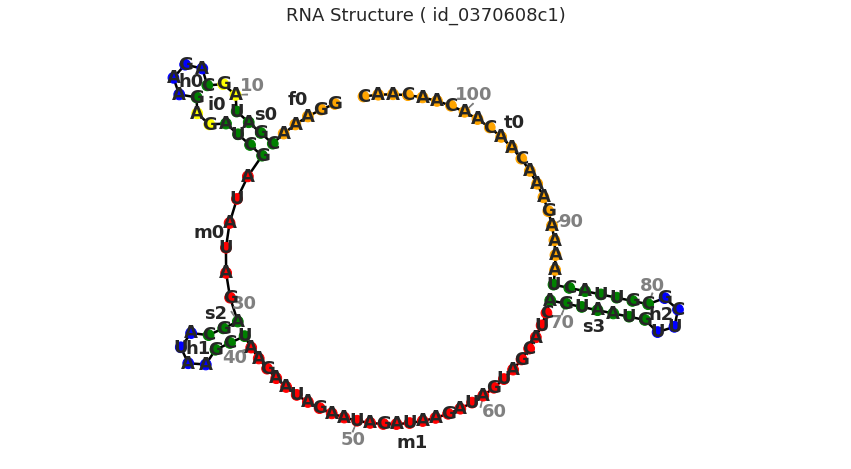

/usr/local/lib/python3.6/site-packages/forgi/visual/mplotlib.py:118: RuntimeWarning: invalid value encountered in true_divide
  norm_vec/=ftuv.magnitude(norm_vec)


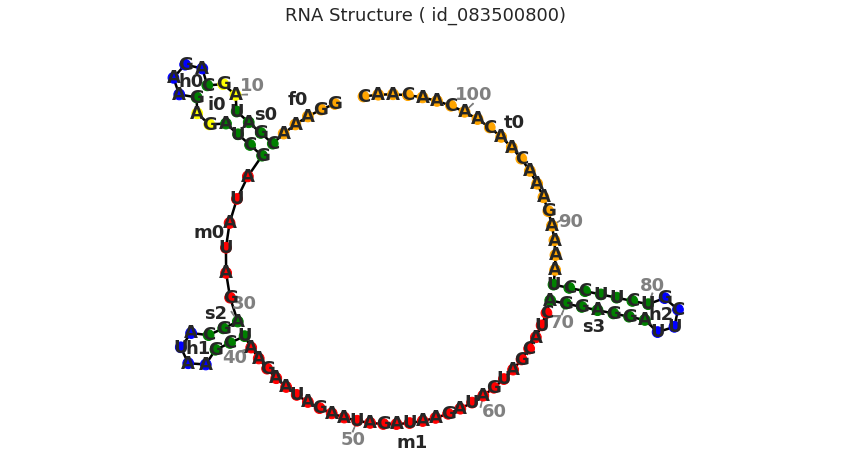

/usr/local/lib/python3.6/site-packages/forgi/visual/mplotlib.py:118: RuntimeWarning: invalid value encountered in true_divide
  norm_vec/=ftuv.magnitude(norm_vec)


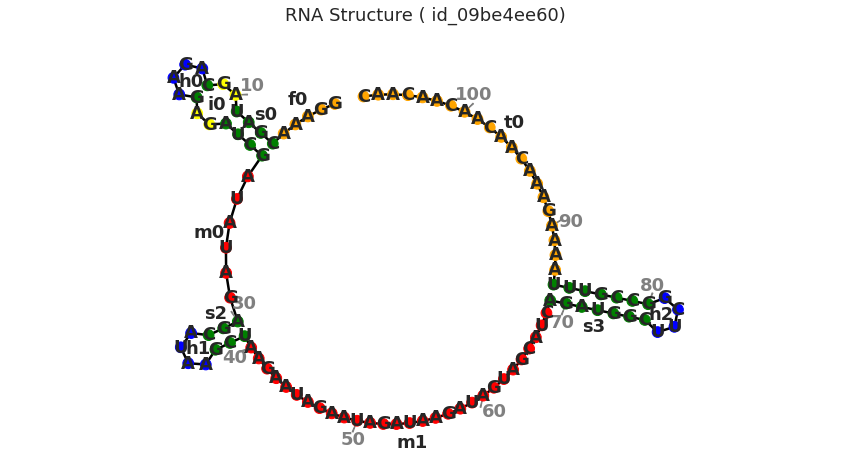

/usr/local/lib/python3.6/site-packages/forgi/visual/mplotlib.py:118: RuntimeWarning: invalid value encountered in true_divide
  norm_vec/=ftuv.magnitude(norm_vec)


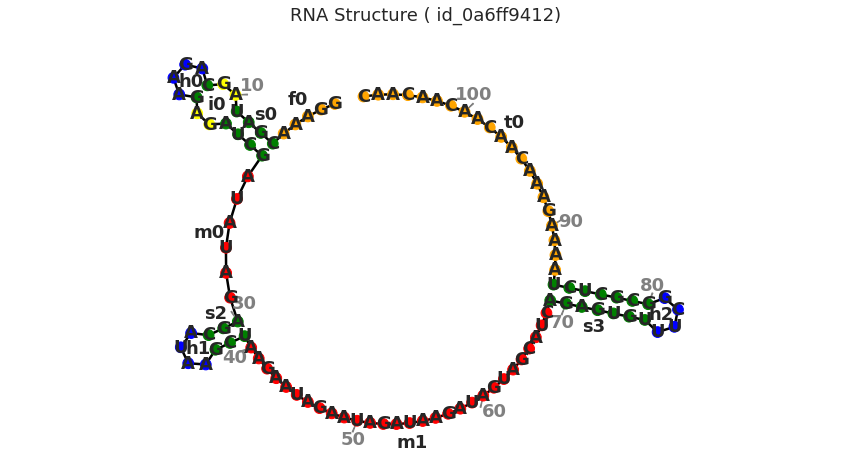

In [ ]:
plots_rna(34, 34)
plots_rna(81, 81)
plots_rna(100, 100)
plots_rna(107, 107)

In [ ]:
train_data.query('id == "id_006f36f57" or id == "id_1abf939e4" or id == "id_1b072023e" or id == "id_1e833c670"')

,id,sequence,structure,predicted_loop_type,signal_to_noise,SN_filter,seq_length,seq_scored,reactivity_error,deg_error_Mg_pH10,deg_error_pH10,deg_error_Mg_50C,deg_error_50C,reactivity,deg_Mg_pH10,deg_pH10,deg_Mg_50C,deg_50C
2,id_006f36f57,GGAAAGUGCUCAGAUAAGCUAAGCUCGAAUAGCAAUCGAAUAGAAU...,.....((((.((.....((((.(((.....)))..((((......)...,EEEEESSSSISSIIIIISSSSMSSSHHHHHSSSMMSSSSHHHHHHS...,8.800,1,107,68,"[0.0931, 0.13290000000000002, 0.11280000000000...","[0.1365, 0.2237, 0.1812, 0.1333, 0.1148, 0.160...","[0.17020000000000002, 0.178, 0.111, 0.091, 0.0...","[0.1033, 0.1464, 0.1126, 0.09620000000000001, ...","[0.14980000000000002, 0.1761, 0.1517, 0.116700...","[0.44820000000000004, 1.4822, 1.1819, 0.743400...","[0.2504, 1.4021, 0.9804, 0.49670000000000003, ...","[2.243, 2.9361, 1.0553, 0.721, 0.6396000000000...","[0.5163, 1.6823000000000001, 1.0426, 0.7902, 0...","[0.9501000000000001, 1.7974999999999999, 1.499..."
259,id_1abf939e4,GGAAAGUGCUCAGAUAAGCUAAGCUCGAAUAGCAAUCGAAUAGAAU...,.......(((.((.....)).)))((((...((..((((......)...,EEEEEEESSSISSHHHHHSSISSSSSSSIIISSIISSSSHHHHHHS...,2.493,1,107,68,"[0.342, 0.48450000000000004, 0.4464, 0.3455000...","[0.923, 0.9252, 0.6802, 0.5193, 0.262800000000...","[0.6019, 0.5891000000000001, 0.3544, 0.3273000...","[0.3975, 0.6313000000000001, 0.4703, 0.4676, 0...","[0.5195000000000001, 0.6889000000000001, 0.575...","[0.44530000000000003, 1.2711999999999999, 1.57...","[1.1327, 1.2491, 0.6424000000000001, 0.1963, -...","[2.6625, 1.8905, 0.8708, 0.4526, 0.6631, 1.012...","[0.35860000000000003, 1.6813, 1.0973, 1.0729, ...","[0.7945, 1.635, 1.713, 0.7509, 1.0542, 1.3664,..."
263,id_1b072023e,GGAAAGUGCUCAGAUAAGCUAAGCUCGAAUAGCAAUCGAAUAGAAU...,.....((((.((.....((((.(((.....)))..((((......)...,EEEEESSSSISSIIIIISSSSMSSSHHHHHSSSMMSSSSHHHHHHS...,9.568,1,107,68,"[0.10310000000000001, 0.1346, 0.11710000000000...","[0.16740000000000002, 0.2615, 0.1955, 0.1621, ...","[0.16690000000000002, 0.176, 0.1073, 0.0887, 0...","[0.10550000000000001, 0.1537, 0.133, 0.1088000...","[0.14400000000000002, 0.1796, 0.1529, 0.1194, ...","[0.6338, 1.5562, 1.2889, 0.976, 0.6582, 0.7445...","[0.37210000000000004, 1.6761, 0.9406, 0.645, 0...","[2.2156000000000002, 3.0318, 0.9847, 0.6598, 0...","[0.4878, 1.7381000000000002, 1.4154, 0.9605, 0...","[0.7685000000000001, 1.8136, 1.3994, 0.8190000..."
297,id_1e833c670,GGAAAGUGCUCAGAUAAGCUAAGCUCGAAUAGCAAUCGAAUAGAAU...,.....((((.((.....((((.(((.....)))..((((......)...,EEEEESSSSISSIIIIISSSSMSSSHHHHHSSSMMSSSSHHHHHHS...,11.692,1,107,68,"[0.076, 0.10010000000000001, 0.089900000000000...","[0.0984, 0.1763, 0.1325, 0.1095, 0.09970000000...","[0.1399, 0.1479, 0.08420000000000001, 0.0694, ...","[0.0828, 0.128, 0.1073, 0.0927, 0.0799, 0.0913...","[0.1232, 0.15380000000000002, 0.1194, 0.1061, ...","[0.5087, 1.2568000000000001, 1.1705, 0.857, 0....","[0.19890000000000002, 1.4041000000000001, 0.82...","[2.4081, 3.1829, 0.9778, 0.6439, 0.7354, 0.921...","[0.40540000000000004, 1.6752, 1.31740000000000...","[0.9293, 1.9996, 1.3171, 1.0651, 0.8619, 1.282..."


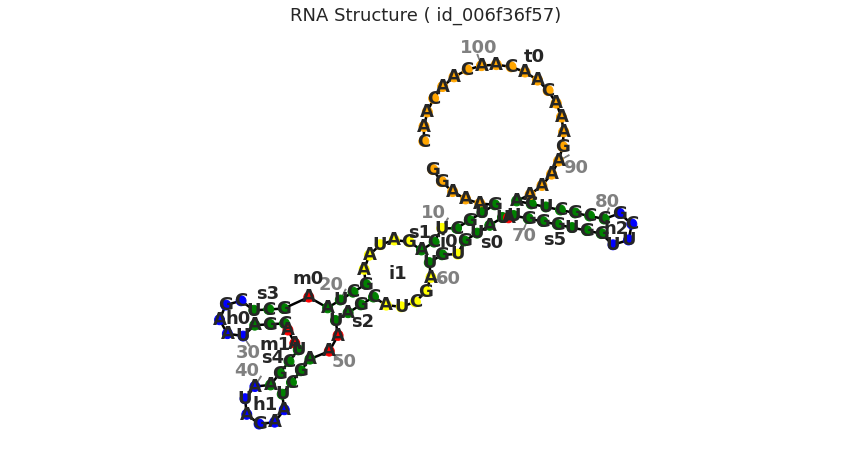

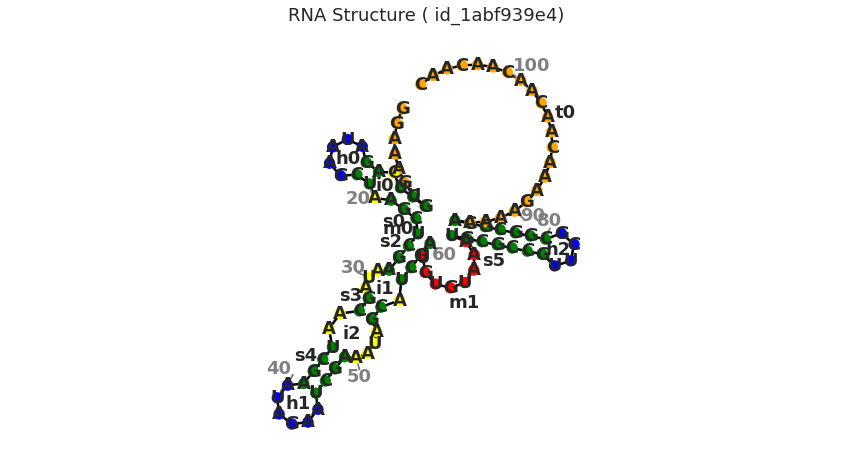

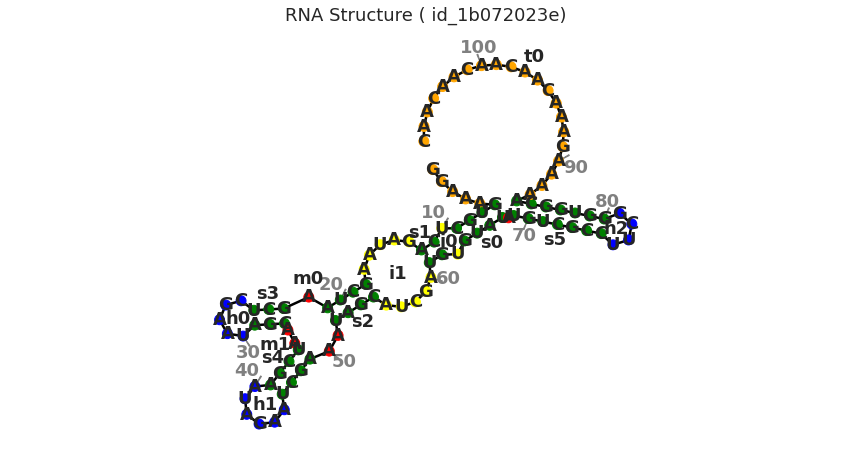

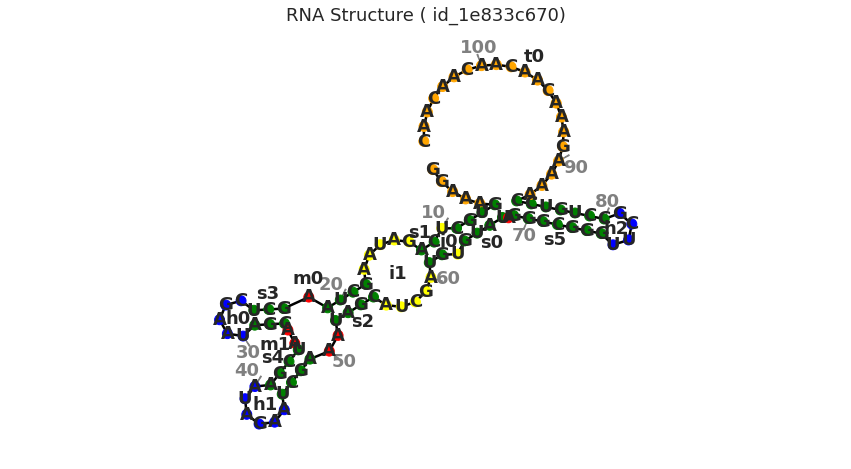

In [ ]:
# cluster 2
plots_rna(2,2)
plots_rna(259,259)
plots_rna(263,263)
plots_rna(297,297)

## Visualisation des données
### Signal to noise


In [ ]:
sns.set("notebook",  style="darkgrid", palette="bright", font_scale = 1.5 , rc = {"lines.linewidth": 2.5})
c_palette = sns.color_palette("bright", 10)

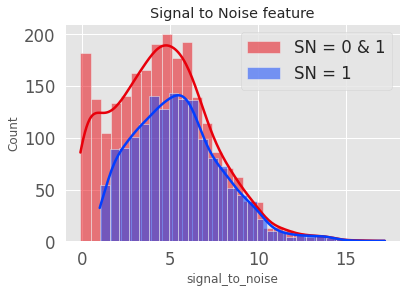

In [ ]:
# Without any filter
plt.figure(figsize=(10,7))

sns.histplot(train_data['signal_to_noise'], kde=True, color=c_palette[3], label="SN = 0 & 1")
# With the filter
sns.histplot(train_data.query("SN_filter==1")['signal_to_noise'], kde=True, color=c_palette[0], label="SN = 1")
plt.title('Signal to Noise feature')
plt.legend()
plt.show()


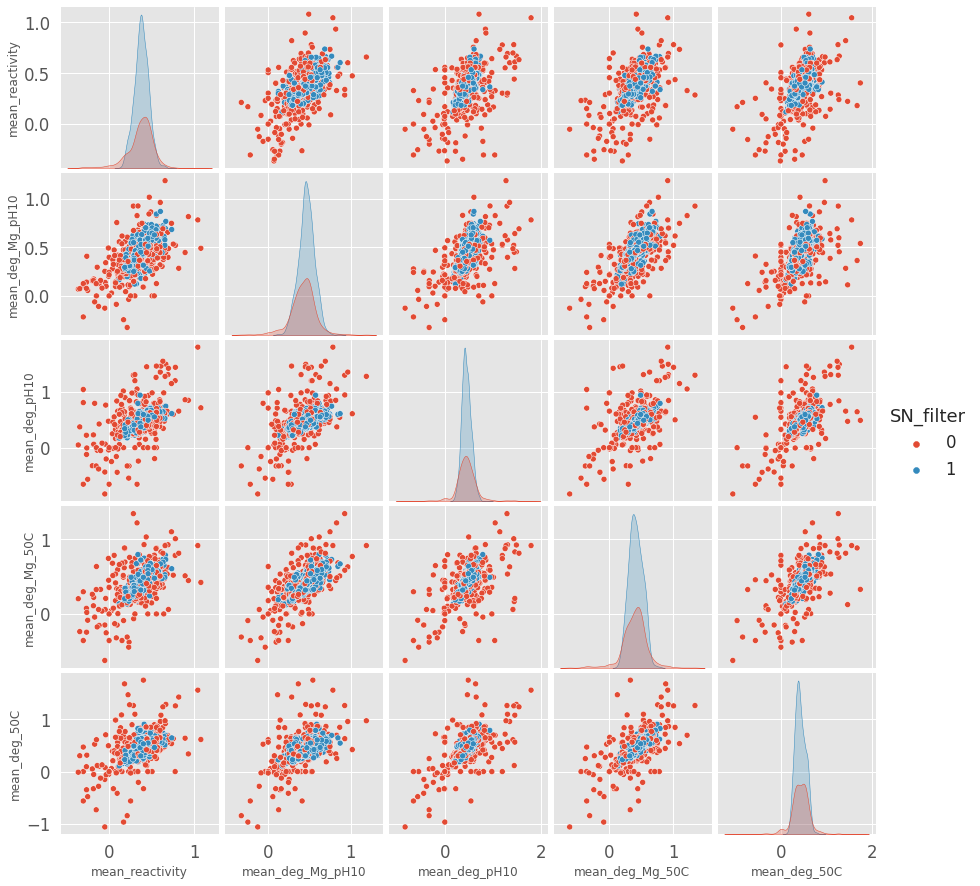

In [ ]:
# Let's calculate the mean of every features to be predicted

train = train_data
train['mean_reactivity'] = train['reactivity'].apply(lambda x: np.mean(x))
train['mean_deg_Mg_pH10'] = train['deg_Mg_pH10'].apply(lambda x: np.mean(x))
train['mean_deg_pH10'] = train['deg_pH10'].apply(lambda x: np.mean(x))
train['mean_deg_Mg_50C'] = train['deg_Mg_50C'].apply(lambda x: np.mean(x))
train['mean_deg_50C'] = train['deg_50C'].apply(lambda x: np.mean(x))

# Let's display it under a pairplot graph
sns.pairplot(data = train, vars = ['mean_reactivity', 'mean_deg_Mg_pH10', 'mean_deg_pH10',
                                   'mean_deg_Mg_50C', 'mean_deg_50C'],
            hue = 'SN_filter')
plt.show()

On voit clairement à l'aide de l'histogramme et du pairplot que les données passant par le filtre sont beaucoup plus pertinentes que les autres: 
* Distribution plus équilibrée 
* Moyenne des attributs à prédire plus centrée 
* Fluctuations moins importante.


### Création de nouveaux attributs

In [ ]:
# We define functions that will count each base, structure, or loop type for every sequence
def base_count(row):
  dict_seq = {'A': 0, 'C': 0, 'G': 0, 'U':0}
  for base in row:
    dict_seq[base] += 1
  return dict_seq.values()

def struct_count(row):
  dict_struct = {'.': 0, '(': 0, ')': 0}
  for struct in row:
    dict_struct[struct] += 1
  return dict_struct.values()

def loop_count(row):
  dict_loop = {'S': 0, 'M':0, 'I': 0, 'B': 0, 'H': 0, 'E': 0, 'X': 0,}
  for loop in row:
    dict_loop[loop] += 1
  return dict_loop.values()


# We choose to select only High Quality data, answering to the SN filter = 1
train_data = train_data[train_data["SN_filter"] == 1]

In [ ]:
# We create dataframes based on the application of the previous functions into our train data
train_seq = train_data["sequence"].apply(base_count)
df_seq = pd.DataFrame(train_seq.tolist(), columns=["A", "C", "G", "U"])
train_struct = train_data["structure"].apply(struct_count)
df_struct = pd.DataFrame(train_struct.tolist(), columns=[".", "(", ")"])
train_loop = train_data["predicted_loop_type"].apply(loop_count)
df_loop = pd.DataFrame(train_loop.tolist(), columns=["S", "M", "I", "B", "H", "E", "X"])

# We add those DataFrame into a new one

df_all = pd.concat([df_seq, df_struct, df_loop], axis=1)

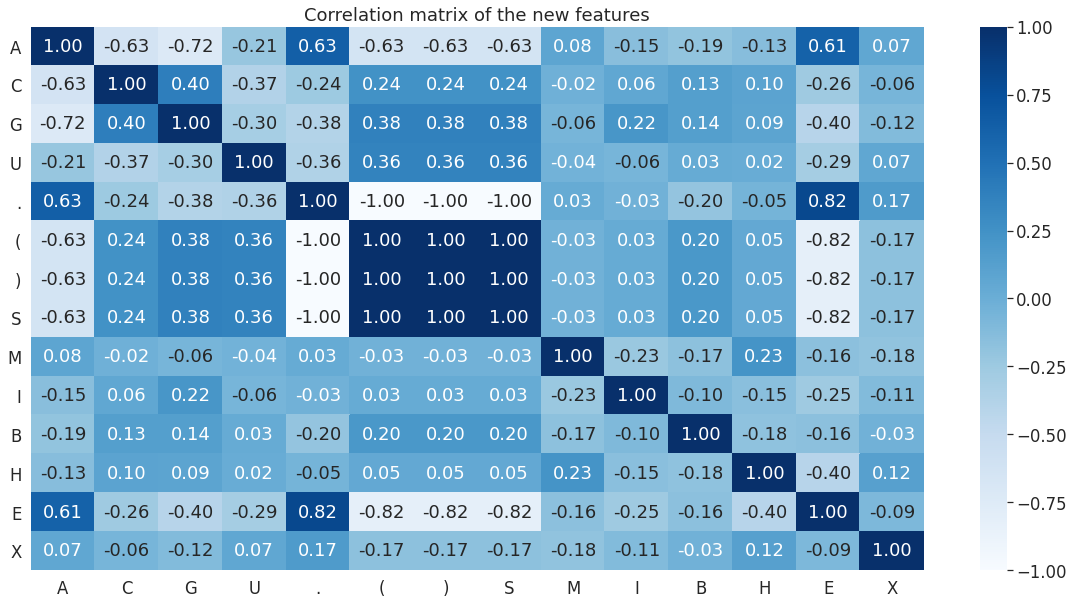

In [ ]:
# We plot a Correlation Matrix with those new features
plt.figure(figsize=(20,10))
plt.title("Correlation matrix of the new features")
map = sns.heatmap(df_all.corr(), annot = True , fmt = '.2f' , cmap = "Blues")
map.set_yticklabels(map.get_yticklabels(), rotation=0);

### Visualisation des données à prédire

In [ ]:
# We select our data
predict_data = train_data[["reactivity", "deg_Mg_pH10", "deg_pH10", "deg_Mg_50C", "deg_50C"]]

# We flatten it into numpy array before making it back into a DataFrame
predict_data_react = np.array(predict_data["reactivity"].values.tolist()).flatten()
predict_data_mgph = np.array(predict_data["deg_Mg_pH10"].values.tolist()).flatten()
predict_data_ph = np.array(predict_data["deg_pH10"].values.tolist()).flatten()
predict_data_mgc = np.array(predict_data["deg_Mg_50C"].values.tolist()).flatten()
predict_data_c = np.array(predict_data["deg_50C"].values.tolist()).flatten()

df_features = pd.DataFrame(zip(predict_data_react, predict_data_mgph, predict_data_ph, predict_data_mgc, predict_data_c), columns = ["reactivity", "deg_Mg_pH10", "deg_pH10", "deg_Mg_50C", "deg_50C"])
df_features.head()

,reactivity,deg_Mg_pH10,deg_pH10,deg_Mg_50C,deg_50C
0,0.3297,0.7556,2.3375,0.3581,0.6382
1,1.5693,2.9830,3.5060,2.9683,3.4773
2,1.1227,0.2526,0.3008,0.2589,0.9988
3,0.8686,1.3789,1.0108,1.4552,1.3228
4,0.7217,0.6376,0.2635,0.7244,0.7877


Violin plot des attributs à observer, après filtration

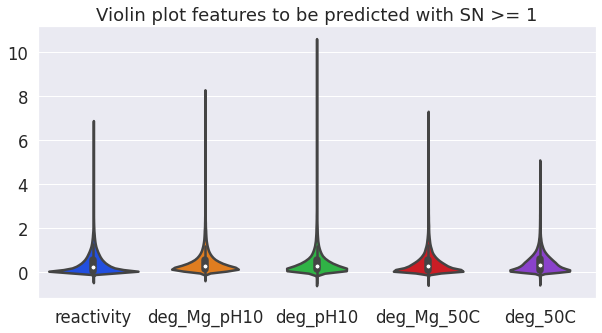

In [ ]:
plt.figure(figsize=(10, 5))
# Violin plots
plt.title("Violin plot features to be predicted with SN_filter = 1")
sns.violinplot(data = df_features);

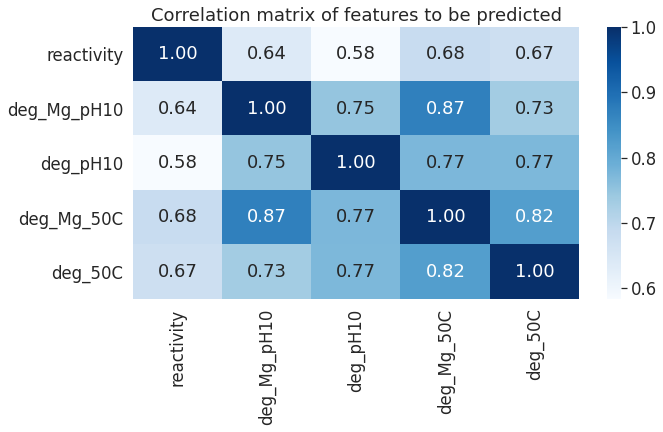

In [ ]:
# We also create a correlation matrix for those features to be predicted
plt.figure(figsize=(10, 5))
plt.title("Correlation matrix of features to be predicted")

map = sns.heatmap(df_features.corr(), annot = True, cmap='Blues', fmt = '.2f')

map.set_yticklabels(map.get_yticklabels(), rotation=0);

### Corrélations observées
On note des corrélations positives notables entre :  
* Les bases d'Adénine et les bases non pairées 
* Les bases d'Adénine et les structures de type dangling end 
* Les bases non pairées et les structures de type dangling end 

On note des corrélations négatives notables entre: 

* Les bases d'Adénine et Guanine, ainsi que Adénine et Cytosine
* Les bases d'adénine et les bases pairées 
* Les structures de type dangling end et les bases pairées

Ce qui corrobore les résultats des corrélations positives. 


### Taux de GC
Ici nous allons observer la distribution de base GC dans les données d'entrainement

46.09283196979233


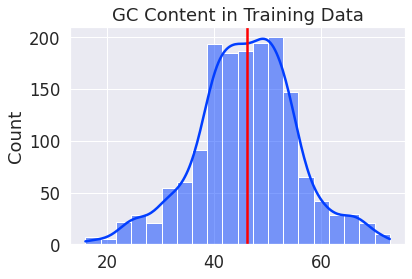

In [ ]:
def gc_content(row):
  return (round((row[1] + row[2])/(sum(row[:]))*100,2))

gc = df_seq.apply(gc_content, axis=1);

sns.histplot(gc, kde=True, bins=20);
plt.axvline(x=np.mean(gc), color="red");
plt.title("GC Content in Training Data")
print(np.mean(gc))

Nous observons une moyenne de 46% ainsi qu'une distribution principalement aux alentours 40 à 55% de GC.